# StatsJam: Gaussianity
##### Christian Gerloff

## Background

Gaussian distribution was formally discovered by Moivre in 1733

however, the cool properties where first discovered by Carl Friedrich

The Gaussian is a member of a family of fundamental natural distributions known as the exponential
family


$PDF(x,\mu,\sigma) = \frac{1}{ \sigma
 \sqrt{2 \pi}} e^{\left(-\frac{{\left(\mu - 
 x\right)}^{2}}{2 \, \sigma^{2}}\right)}$


This function is mainly described by the first order statistics mean and scale (standard deviation).

Hence, we can write a random event as normal distributed by:

$X \sim \mathcal{N}(\mu,\,\sigma^{2})\,$


the symetric (centered) "bell" shape is mainly influenced by the term $\left(\mu - x\right)^{2}$

**IQ:**

above a normal distributed variable $X$ representing the IQ with $X \sim \mathcal{N}(100,\,15^{2})\,$ is depicted:




**Note:** Probability density is the rate of change in cumulative probability.

  So where the cumulative probability is increasing rapidly, density can easily exceed 1.
   
However, if we calculate the area under the density function, it will never exceed 1. Such areas are also called probability mass


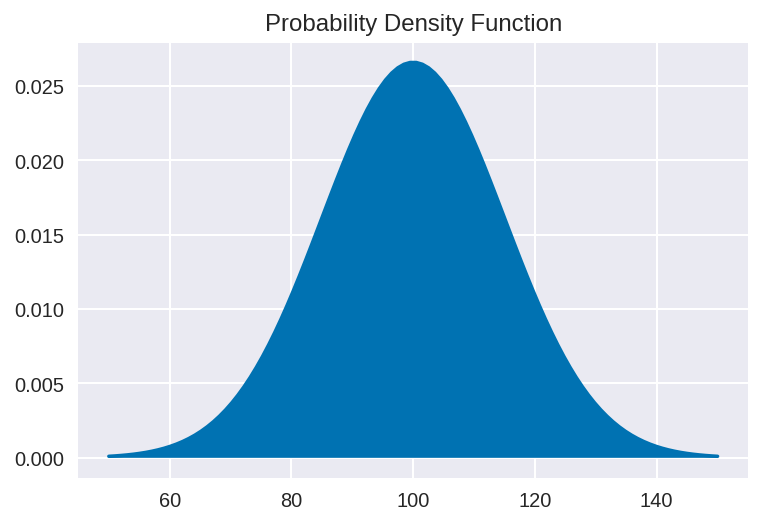

In [0]:
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import griddata
from sympy import *
from IPython.display import *
init_printing(use_latex=True)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

var('a b x sigma mu')
pdf = Lambda((x,mu,sigma),
  (1/(sigma * sqrt(2*pi)) * exp(-(mu-x)**2 / (2*sigma**2)))
)

x = np.linspace(50,150,100)
y = np.array([pdf(v,100,15) for v in x],dtype='float')
plt.grid(True)
plt.title('Probability Density Function')
plt.plot(x,y)
plt.fill_between(x,y,0)
plt.show()

## Deduced Difference: Mean & Expected Value

The figure illustrates that the mean is 100 points, so the long-run average value of repetitions of the same experiment is 100.

So the mean of a normal distribution represents the expected value of a random variable.

**Take away:** boiling down a vector or matrix of values to a scalar (single value) via the mean to represent some kind of expectation requires normally distributed values


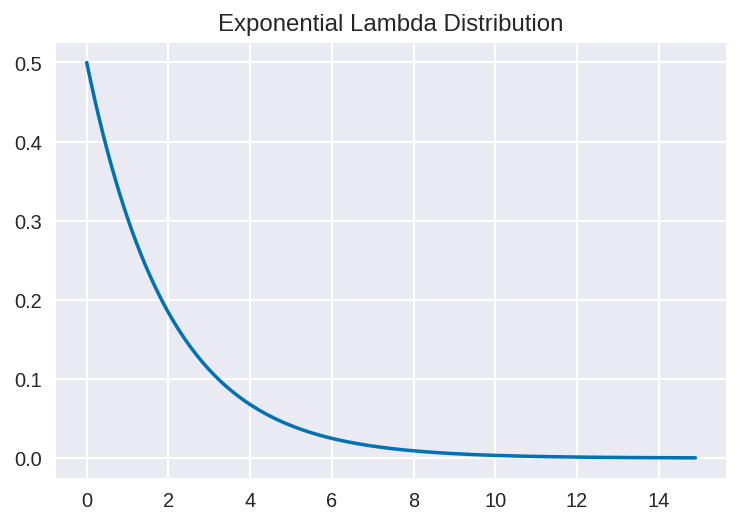

mean: 0.06830941986351888
expected value: 2.0


In [0]:
lambd = 0.5
x = np.arange(0, 15, 0.1)
y = lambd * np.exp(-lambd * x)
plt.grid(True)
plt.title('Exponential Lambda Distribution')
plt.plot(x,y)
plt.show()
print('mean: ' + str(np.mean(y)))
print('expected value: ' + str(1/lambd))

## Why are Gaussian Distributions Normal

**mind experiment**,  let us imagine



*   we are on a soccer field perhaps here on the Tivoli
*   let us hope Alemania Aachen has 1000 fans
*   all these fans a standing side by side in a line on the field
*   every groupie has a coin in her/his/its hand

random variable $F$:

*   every one flipps her/his/its coin $n$ times with  $n \in \mathbb{N}$
*   each result can be head or number $p\in {0,1} $ s.t. $F \sim B\left(n,p \right)$

*   in case a groupie flipped the coin archives  head  ($p=1$) he will move to the right 
*   otherwise ($p=0$) he will move to the left

random variable $X$:

*   this experiment is performend by 1000 independent groupies at the same time


**question 1**  Does the general position of the line change dramatically?

**question 2** 
How many people are exactly standing at the start position?

**question 3** How many people are more than 2 steps right to the line?




### What do we know from the experiment:

**what would be expect:**
there are so many  possible ways to realise a sequence of left-right steps so the movements should sum up to zero

If I flip a coin, I can not influence your coin flipping, and it also does not influence my next flip

 *  every random variable is independent

every result of the flipping can only be head or number, and everyone repeats the experiment $n$ times
 * results should be identically distributed

So the experiment is assumed to be **i.i.d.**


**NOTE:**
i.i.d. is hardly true in the real world but can be conditioned in models/representations of the real world. Hence, it is an epistemological assumption. It is not a physical assumption

#### Code 4.1

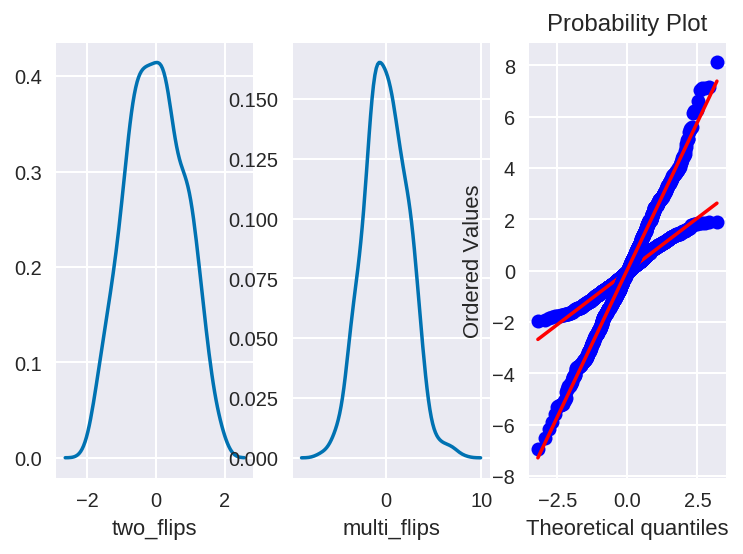

mean: 0.04857753999789665


In [0]:
from scipy import stats
data = np.column_stack((np.random.uniform(-1, 1, size=(2, 1000)).sum(0), np.random.uniform(-1, 1, size=(16, 1000)).sum(0)))
data = pd.DataFrame(data, columns=['two_flips', 'multi_flips'])
fig, axs = plt.subplots(ncols=3)
sns.distplot(data.two_flips, hist=False, ax=axs[0])
sns.distplot(data.multi_flips, hist=False, ax=axs[1])
stats.probplot(data.two_flips, plot=sns.mpl.pyplot)
stats.probplot(data.multi_flips, plot=sns.mpl.pyplot)
plt.show()
print('mean: ' + str(np.mean(data.multi_flips)))


**First Observation** with increasing $n$ - more coin flips - the distribution better fits to a normal distribution

adding up experiments leads to a "bell" curve

alternatively, in Richards words:"the familiar bell curve of the Gaussian distribution is emerging from the randomness."

**lemma 1. (ADDITION):**
Any process that adds together random values from the same distribution converges to
a normal distribution

**hint** if that is the case the mean of the distribution should be ~ zero
 * that is the case, see figure above
 
 
 **proof: central limit theorem**
 * for a process conducted of i.i.d. random variables $X$ from the same distribution with $n \rightarrow \infinity$ s.t. $X$ will follow a normal distribution
 with converging mean to zero
 
 
 **Therefore**:
 This experiment should be normal distributed: $X \sim \mathcal{N}(\mu,\,\sigma^{2})$
 
 **answer to Q1** the total position of the groupies, will not change, the mean is zero


## Deduced Difference: The Mother of Distributions

Consequence: It does not matter what shape the underlying distribution possesses has.

**Assuming i.i.d., any experiment will converge to a normal distribution**

This is unique!
 

## Deduced Difference: Continuous Distribution

We all associated with normal distribution this bell curve, but the PDF it self (hight of Fig.1) does not allow any conclusions about the probability of an event X. 

**answer Q2:**
Because it's a continuous distribution where we can only assign a probability to an interval compared to the Poisson distribution. This means for $Pr(X=0)=0$. In a position distribution, we would be able to calculate this probability.


Because there exists no analytical integral for the PDF of a normal distribution, we approximate it with the Cumulative Distribution Function (CDF).

Hence, in our analytics world, we are often just playing around with CDFs instead of the common bell curve of the PDF

**ANOTHER Epistemological consequence:** it can be applied to regression task

**Note:** nerds term the PDF of a normal distribution as CFG


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


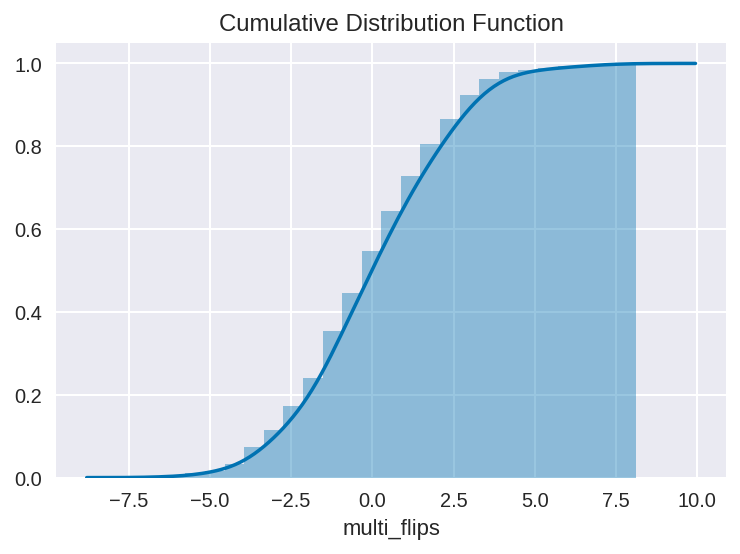

In [0]:
var('a b x sigma mu')
pdf = Lambda((x,mu,sigma),
  (1/(sigma * sqrt(2*pi)) * exp(-(mu-x)**2 / (2*sigma**2)))
)
cdf = Lambda((a,b,mu,sigma),
  integrate(
    pdf(x,mu,sigma),(x,a,b)
  )
)
sns.distplot(data.multi_flips,
             hist_kws={"cumulative": True},
             kde_kws={"cumulative": True})
plt.title('Cumulative Distribution Function')
plt.show()


but we can now can 

**answer Q3:**

In [0]:
POSITION = 2
print('the probability that a person moved more than ' + str(POSITION) + ' steps to the right is ' + str(N(cdf(POSITION,1e99,np.mean(data.multi_flips),np.std(data.multi_flips)))*100) + '%')


the probability that a person moved more than 2 steps to the right is 19.7231023084952%


In [0]:
print(str(N(cdf(POSITION,1e99,np.mean(data.multi_flips),np.std(data.multi_flips)))*1000) + ' fans moved more than ' + str(POSITION) + ' steps to the right')
print(str((abs(N(cdf(-1,1e99,np.mean(data.multi_flips),np.std(data.multi_flips))))-abs(N(cdf(1,1e99,np.mean(data.multi_flips),np.std(data.multi_flips)))))*1000) + ' moved one step')

197.231023084952 fans moved more than 2 steps to the right
337.364716846175 moved one step


## More than a Mother of all Additive Distributions

### lemma 2. (Multiplication):

Besides cumulative cases also small interactions, expressed as multiplications result in Gaussian Distributions. This can also be shown by series expansion.

 *  with decreasing interactions the series/observations converge to a Gaussian Distribution


In [0]:
print(str(1.1* 1.1))
print('Distributivity property: ' + str((1+0.1)*(1+0.1))) 

1.2100000000000002
Distributivity property: 1.2100000000000002


### lemma 3. (Log-Multiplication):

Large deviates that are multiplied together do not produce Gaussian distributions, but they do tend to produce Gaussian
distributions on the log scale


## Ontological justification

the world is full of Gaussian distributions, approximately.
As a mathematical idealization, we are never going to experience a perfect Gaussian
distribution. However, it is a widespread pattern!


**Consequence:**
- driven by natural phenomens

 Jaynes that, “in Nature,
all smooth processes with increasing entropy lead to
Gaussianity and once it is reached, it is then preserved.”


- statistical models based on Gaussian distributions cannot
reliably identify micro-process but can be applied on a macro perspective


## Epistemological justification

simplest distribution, most natural

If you don’t think the distribution should be Gaussian, then that implies that you know something else

More properties


 *   the convolution of two Gaussian functions is another Gaussian function
 
 
 *   the Fourier transform of a Gaussian function is another
Gaussian function (hence its time and frequency behaviour is normally distributed)

--> 
 All good denoising methods are non-linear: they separate the regular and the non-regular 
parts of the signal and pay attention not to average where the signal aspect of interest si.


 * maximising entropy (Gaussian distribution
has higher entropy than any other with the same variance so it best represents the current state of data)


 If you only fix a finite variance (or a particular value), the Gaussian is the most conservative distribution


 * minimising Fisher information (lower boundary upon a parameter
estimator’s variance)


## Connection to Linear Methods

I mentioned that Gauss was the first how recognised why this distribution is cool. He looked into fitting linear models;

so to $ y = \Phi*\beta  + \epsilon$, where the vector y and
the matrix $\Phi$  are known, the vector of parameters $\beta $ and the
noise vector $\epsilon$  unknown; to solve this linear regression problem Gauss asked?:

“What would be a distribution density $f(x, \theta)$ for which the maximum likelihood estimate is θ the sample mean" This is precisely the Gaussian distribution

So Gauss invented the least-squares (LS) method to fit linear models which solve this question by

$\tilde\Phi*\Phi*\beta = \tilde\Phi * y$


Mallat: As much as we are dealing with Gaussian distributions, the best we can do is linear models. Often the non-linear regime can outperform the linear regime as soon as we abandon the Gaussianity assumption.

## Additional Practial Hints

McElreath: you can take the mean out of a Gaussian distribution and treat the distribution as a constant plus a Gaussian distribution centered on zero -> this feature of the GD arise fro the independence of the mean and standard deviation. Most distributions do not have this property.
One form or another can lead to more efficient fits.

McElreath: there are practical and epistemological justifications for the use of multivariate Guasisan in intercept and slopes; Practically, not many other multivariate distributions are easy to work with, mostly only multivariate Student t distribution, besides multivariate Gaussian.

Gelman07: linear transformations of the Gaussian distribution are still Gaussian

# Source 

for a depper look 10.1109/MSP.2007.913700

with transition to linear models: McElreath (2015) Statistical Rethinking: A Bayesian Course with Examples in R and Stan

## Appendix

![alt text](https://magesblog.com/img/magesblog/distributions.png)